# Exploring the top 1000 trending YouTube Videos of Jan/2025

The following exploritory analysis will compare videos when compared to all aggregated metrics.

In [19]:
#-- Importing all nessessary libraries --#
import pandas as pd
import numpy as np 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
#-- Importing the dataset --#
df = pd.read_csv('/Users/michaelsegaline/Desktop/2025 Youtube exploration/Most popular 1000 Youtube videos.csv')

In [3]:
df.head()


rank                                              Video    Video views  \
0     1  Lil Nas X - Old Town Road (Official Movie) ft....     54,071,677   
1     2  20 Tennis shots if they were not filmed, NOBOD...      3,471,237   
2     3                 JoJo Siwa - Karma (Official Video)     34,206,747   
3     4    David Kushner - Daylight (Official Music Video)     18,558,390   
4     5  Wiz Khalifa - See You Again ft. Charlie Puth [...  6,547,981,039   

        Likes Dislikes Category  published  
0   3,497,955   78,799    Music       2019  
1      19,023      859      NaN       2017  
2     293,563      NaN    Music       2024  
3     680,732      NaN    Music       2023  
4  44,428,537      NaN    Music       2015

In [4]:
df.shape

(1000, 7)

In [5]:
df.dtypes

rank            int64
Video          object
Video views    object
Likes          object
Dislikes       object
Category       object
published       int64
dtype: object

# Data Cleaning

In [6]:

# Replace NaN with 0
df = df.fillna(0)

# Remove commas and convert Likes and Dislikes to int
df['Video views'] = df['Video views'].astype(str).str.replace(',', '').astype(int)
df['Likes'] = df['Likes'].astype(str).str.replace(',', '').astype(int)
df['Dislikes'] = df['Dislikes'].astype(str).str.replace(',', '').astype(int)

# Strip all text in the Video column
df['Video'] = df['Video'].str.strip()

# Display the modified DataFrame
print(df.dtypes)  # Check data types to confirm changes
print(df.head())  # Show first few rows

rank            int64
Video          object
Video views     int64
Likes           int64
Dislikes        int64
Category       object
published       int64
dtype: object
   rank                                              Video  Video views  \
0     1  Lil Nas X - Old Town Road (Official Movie) ft....     54071677   
1     2  20 Tennis shots if they were not filmed, NOBOD...      3471237   
2     3                 JoJo Siwa - Karma (Official Video)     34206747   
3     4    David Kushner - Daylight (Official Music Video)     18558390   
4     5  Wiz Khalifa - See You Again ft. Charlie Puth [...   6547981039   

      Likes  Dislikes Category  published  
0   3497955     78799    Music       2019  
1     19023       859        0       2017  
2    293563         0    Music       2024  
3    680732         0    Music       2023  
4  44428537         0    Music       2015  


Converting categorical variables to binary.


In [7]:
df = pd.get_dummies(df, columns=['Category'], dtype=int)

In [8]:
df.dtypes

rank                               int64
Video                             object
Video views                        int64
Likes                              int64
Dislikes                           int64
published                          int64
Category_0                         int64
Category_Autos & Vehicles          int64
Category_Comedy                    int64
Category_Education                 int64
Category_Entertainment             int64
Category_Film & Animation          int64
Category_Gaming                    int64
Category_Howto & Style             int64
Category_Music                     int64
Category_News & Politics           int64
Category_Nonprofits & Activism     int64
Category_People & Blogs            int64
Category_Pets & Animals            int64
Category_Science & Technology      int64
Category_Sports                    int64
Category_Travel & Events           int64
dtype: object

In [9]:
#-- Renaming columns by removing "Category_" --#
df.columns = df.columns.str.replace('Category_', '', regex=False)

In [10]:
df.dtypes

rank                      int64
Video                    object
Video views               int64
Likes                     int64
Dislikes                  int64
published                 int64
0                         int64
Autos & Vehicles          int64
Comedy                    int64
Education                 int64
Entertainment             int64
Film & Animation          int64
Gaming                    int64
Howto & Style             int64
Music                     int64
News & Politics           int64
Nonprofits & Activism     int64
People & Blogs            int64
Pets & Animals            int64
Science & Technology      int64
Sports                    int64
Travel & Events           int64
dtype: object

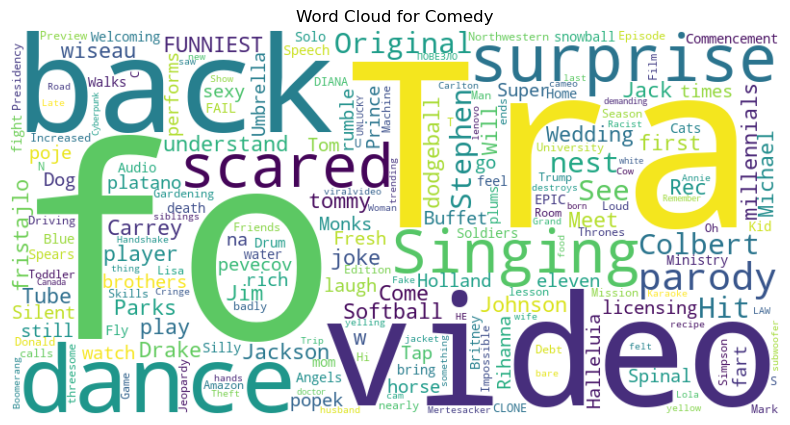

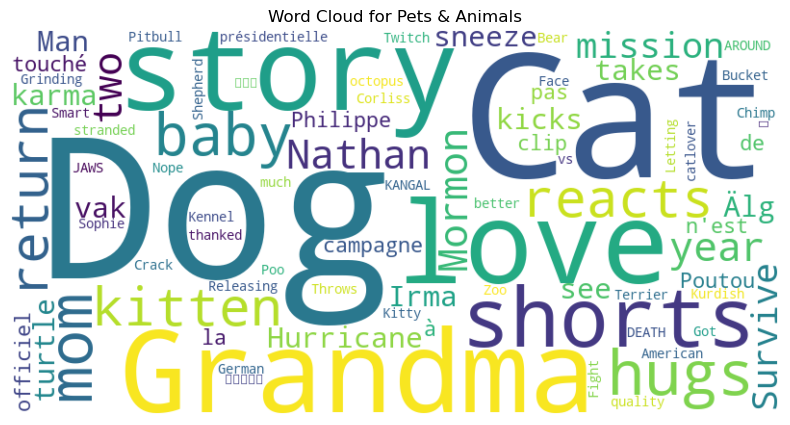

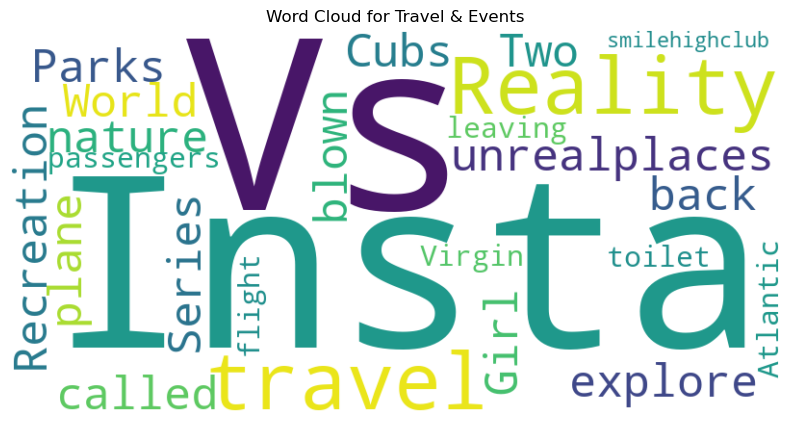

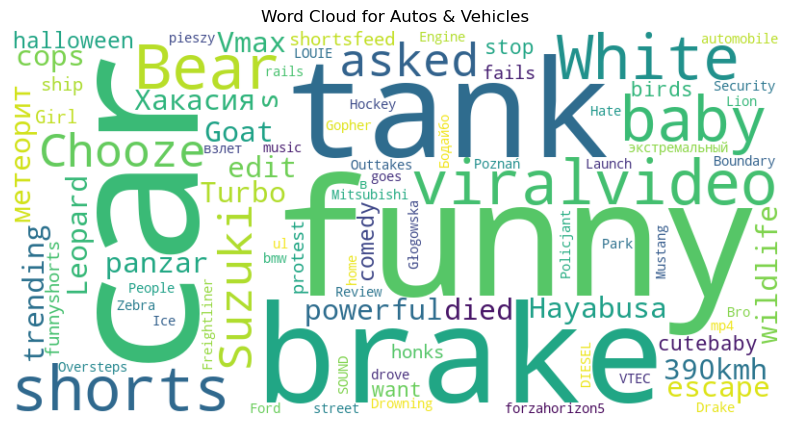

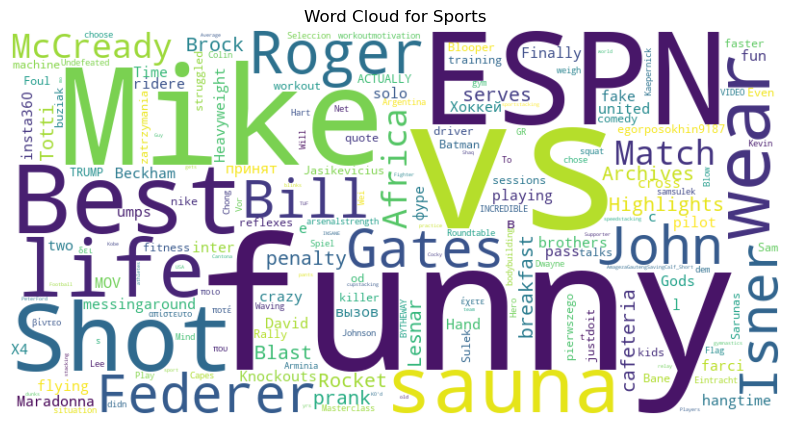

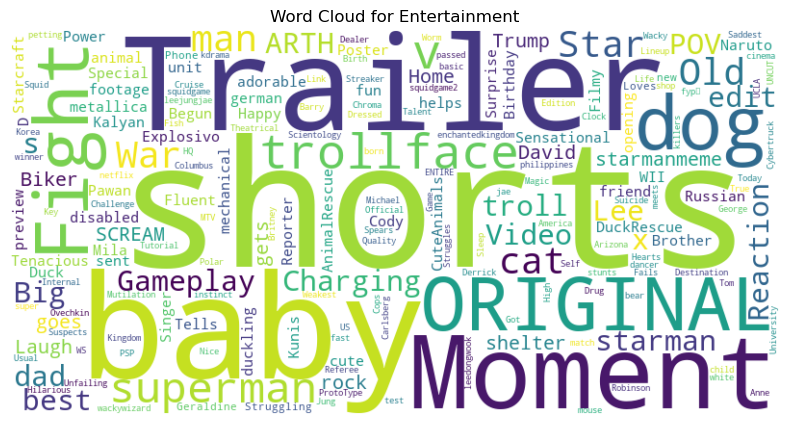

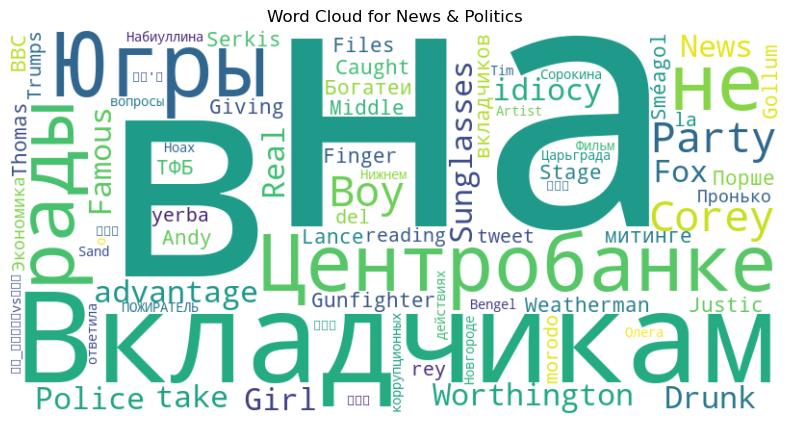

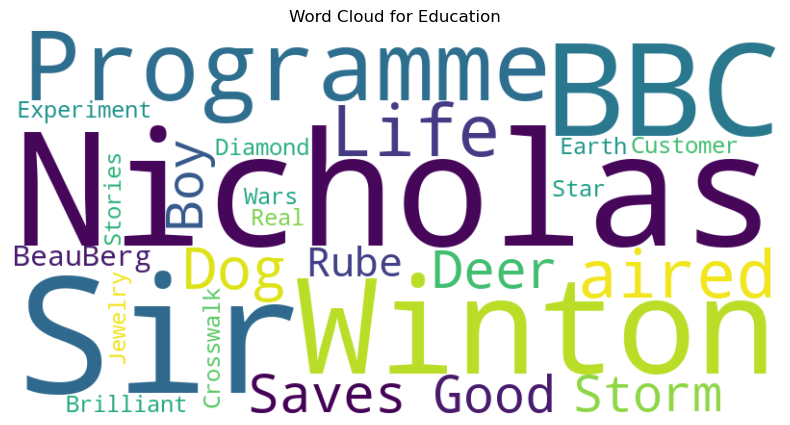

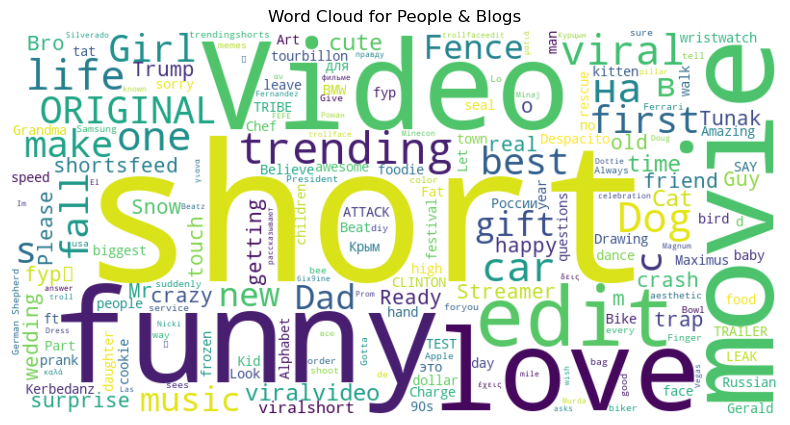

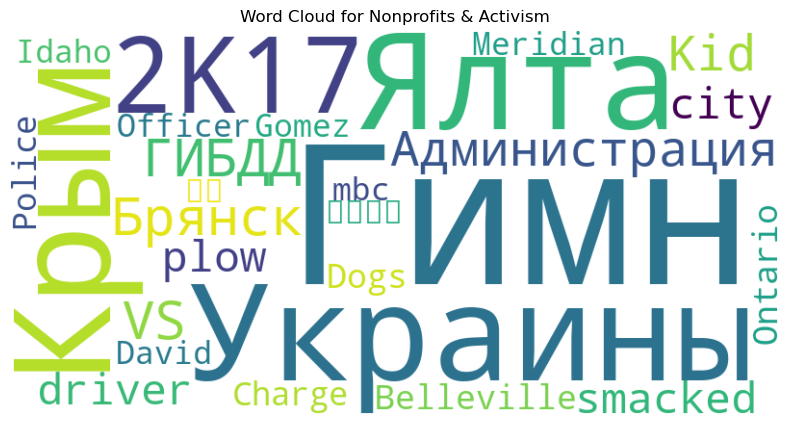

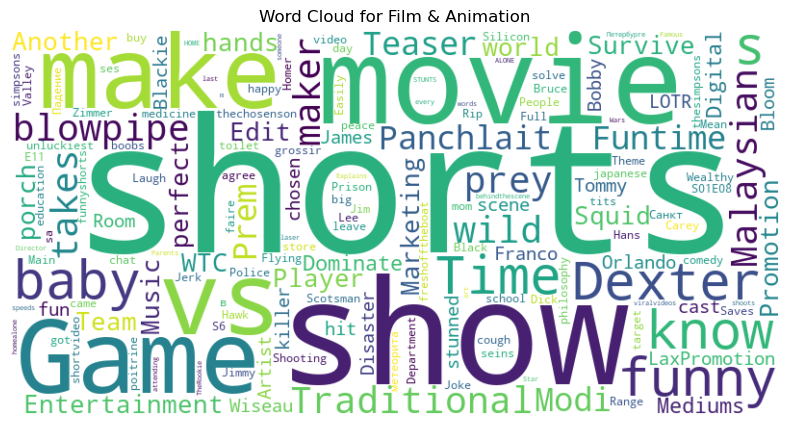

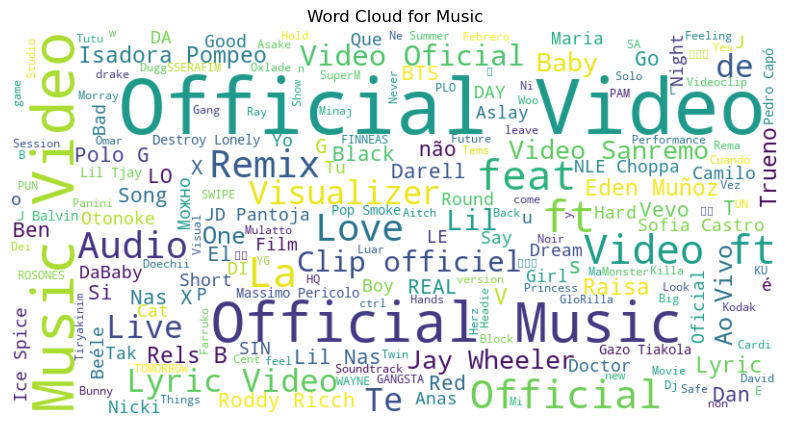

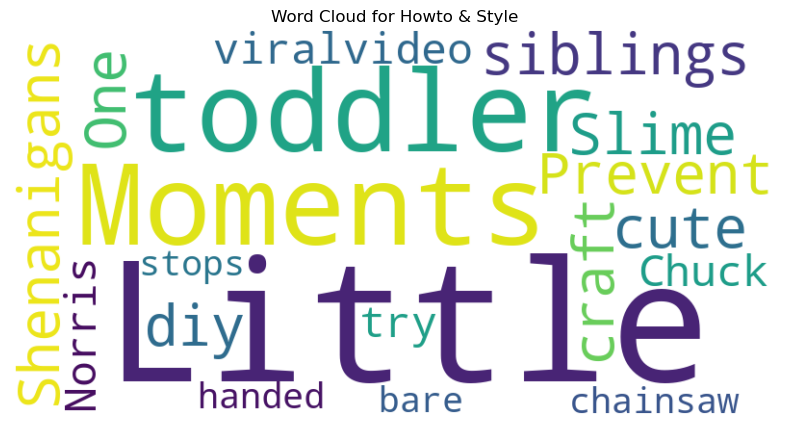

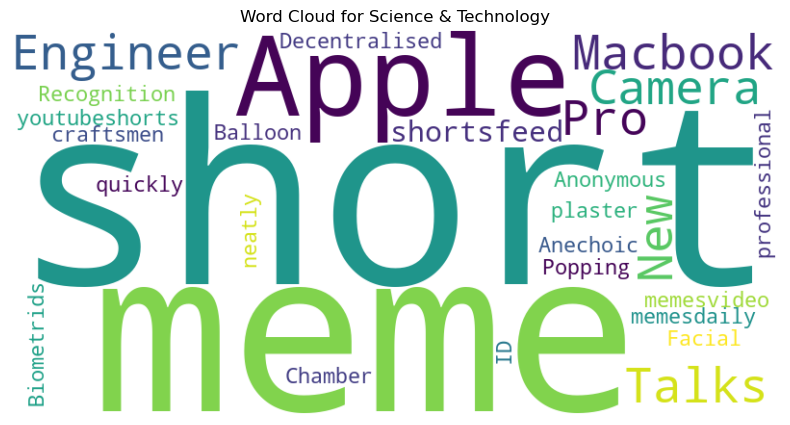

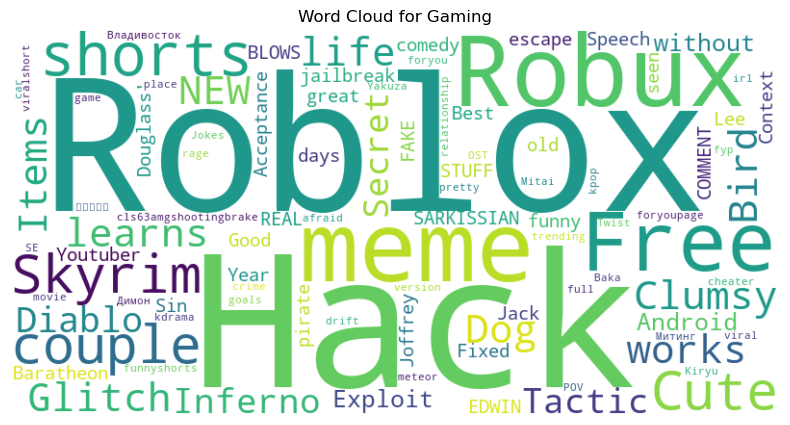

In [11]:
# Define the categories list before using it
categories = [
    'Comedy', 'Pets & Animals', 'Travel & Events', 'Autos & Vehicles', 'Sports', 'Entertainment',
    'News & Politics', 'Education', 'People & Blogs', 'Nonprofits & Activism', 'Film & Animation',
    'Music', 'Howto & Style', 'Science & Technology', 'Gaming'
]

# Function to create a word cloud for each category
def generate_word_cloud(df, category):
    # Filter the dataframe for the specific category
    category_df = df[df[category] == 1.0]  # Assuming 1.0 indicates presence in the category

    # Combine all the text from the 'Video' column
    text = " ".join(category_df['Video'].dropna())

    # Generate a word cloud with white background
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {category}")
    plt.show()

# Iterate over the categories and generate word clouds
for category in categories:
    generate_word_cloud(df, category)

# Now feature engineering Engagment Per View EPV


In [12]:
# Ensure Views, Likes, and Dislikes are numeric
df['Video views'] = df['Video views'].astype(float)
df['Likes'] = df['Likes'].astype(float)
df['Dislikes'] = df['Dislikes'].astype(float)

# Calculate EPV
df['EPV'] = df['Video views'] / (df['Likes'] + df['Dislikes'])

# Handle division by zero cases (replace infinite values with NaN)
df['EPV'].replace([float('inf'), -float('inf')], np.nan, inplace=True)

# Display the first few rows
print(df[['Video views', 'Likes', 'Dislikes', 'EPV']].head())


    Video views       Likes  Dislikes         EPV
0  5.407168e+07   3497955.0   78799.0   15.117528
1  3.471237e+06     19023.0     859.0  174.591942
2  3.420675e+07    293563.0       0.0  116.522678
3  1.855839e+07    680732.0       0.0   27.262403
4  6.547981e+09  44428537.0       0.0  147.382324


# Now comparing EPV per Category

In [13]:
# Create a dictionary to store average EPV for each category
category_epv = {}

# Loop through each one-hot encoded category column (excluding 'EPV' column)
for category in df.columns:
    if category not in ['EPV', '0']:  # Exclude non-category columns
        # Filter rows where the category is 1, then compute the mean EPV
        avg_epv = df.loc[df[category] == 1, 'EPV'].mean()
        category_epv[category] = avg_epv

# Convert to DataFrame and rank
category_ranking = pd.DataFrame(category_epv.items(), columns=['Category', 'Avg_EPV'])
category_ranking = category_ranking.sort_values(by='Avg_EPV', ascending=False).reset_index(drop=True)
category_ranking['Rank'] = category_ranking['Avg_EPV'].rank(method='dense', ascending=False)

# Display the results
print(category_ranking)



                 Category     Avg_EPV  Rank
0                  Comedy  486.682469   1.0
1          Pets & Animals  454.548710   2.0
2         Travel & Events  427.049508   3.0
3        Autos & Vehicles  392.377678   4.0
4                  Sports  375.861080   5.0
5           Entertainment  337.392041   6.0
6         News & Politics  255.890793   7.0
7               Education  189.478321   8.0
8          People & Blogs  153.288387   9.0
9   Nonprofits & Activism  150.660540  10.0
10       Film & Animation  147.289194  11.0
11                  Music   90.950217  12.0
12          Howto & Style   76.394866  13.0
13   Science & Technology   70.047539  14.0
14                 Gaming   50.122396  15.0
15                   rank   15.117528  16.0
16                  Video         NaN   NaN
17            Video views         NaN   NaN
18                  Likes         NaN   NaN
19               Dislikes         NaN   NaN
20              published         NaN   NaN


# Now comparing Likes per category

In [14]:

# Group by the "published" year and aggregate the EPV (for example, taking the average EPV)
top_years = df.groupby('published')['EPV'].mean().sort_values(ascending=False).head(10)

# Display the top 10 years
print(top_years)

published
2007    891.656714
2009    777.021544
2006    716.148496
2005    614.593153
2012    570.741698
2011    529.343175
2008    511.605661
2015    509.688664
2014    496.846608
2010    428.040620
Name: EPV, dtype: float64


In [15]:
# Group by the "published" year and aggregate the Likes (for example, taking the average EPV)
top_years_likes = df.groupby('published')['Likes'].mean().sort_values(ascending=True).head(10)
print(top_years_likes)

published
2005     4184.500000
2009    13597.615385
2010    15744.750000
2012    16848.666667
2008    21627.565217
2007    21787.137931
2017    22908.666667
2006    27956.692308
2016    34289.229508
2013    35350.333333
Name: Likes, dtype: float64


In [16]:
# Group by the "published" year and aggregate the Video Views (for example, taking the average EPV)
top_years_views = df.groupby('published')['Video views'].mean().sort_values(ascending=False).head(10)
print(top_years_views)

published
2015    4.719715e+08
2019    1.689545e+08
2018    1.322852e+08
2025    3.351285e+07
2024    1.640138e+07
2008    1.160231e+07
2007    1.158043e+07
2006    9.720688e+06
2011    9.061884e+06
2014    9.004450e+06
Name: Video views, dtype: float64


# Now generating an output of all the Japanese titles

In [17]:
# Function to check if a string contains Japanese characters
def contains_japanese(text):
    if pd.isna(text):  # Handle NaN values
        return False
    return bool(re.search(r'[\u3040-\u30FF\u4E00-\u9FFF]', text))

# Apply the function to filter rows
df_japanese = df[df['Video'].apply(contains_japanese)]

# Display the filtered results
df_japanese[['Video', 'EPV']].sort_values(by='EPV', ascending=False).head(25)

Video         EPV
849                         吳青峰 - （……小王子）（feat. 大橋三重唱）  256.552623
953                                  2016 MAMA 王大陸 大平台  232.386717
508  吳青峰 - （......催眠大師）（feat. Maîtrise Saint-Marc -...  198.062483
917  【100万再生回数達成】★大阪人気ナンバーワンのエステサロン★1分間ポンポンするだけで究極リ...  181.641621
789                        【最凶】東海オンエアはゆめまるが一番、天才説でごわす。  114.539261
708                                       沖縄県警、DQNをはねる   93.710867
352         Official髭男dism - Subtitle [Official Video]   93.235404
718                             同婚_釋昭慧法師vs基督教 20161124   62.947574
998  Yakuza OST - Baka Mitai (ばかみたい) Kiryu full ver...   62.193593
444                                         2024年5月18日   61.633085
522   Sakeru Gum series さけるグミ #1-11 complete (Eng SUB)   51.558524
560                                             シカ色デイズ   44.218830
784                                              初恋キラー   34.181220
36   [Dandadan] Creepy Nuts - オトノケ(Otonoke) (Offici...   31.545984
275         ディア♡マイフレンド feat. ちゅーたん（CV：早見沙織）／HoneyWorks   28.671949
74                    新時代 (ウタ from ONE PIECE FILM RED)   27.684148
264  三代目 J SOUL BROTHERS from EXILE TRIBE / Rat-tat...   26.194013
593              同担☆拒否 feat. ちゅーたん（CV：早見沙織）／HoneyWorks   25.980984
46                             紫 今 - 魔性の女A　Lyric Video   25.846811
103  偽物偽物偽物偽物偽物偽物偽物偽物偽物偽物偽物偽物偽物偽物偽物偽物偽物偽物偽物偽物偽物偽物偽物...   22.598582
928  think smarter not harder🤨#funnymemes #harvard ...   22.196670
356  Bro turned his pet bird into a boomerang #funn...   16.208301
481  a shop for killers #kdrama #leedongwook #fypシ ...   15.648212
762  I bet this music video was so fun to make #edi...   14.593674

Now creating a WordCloud for the trending Japanese titles

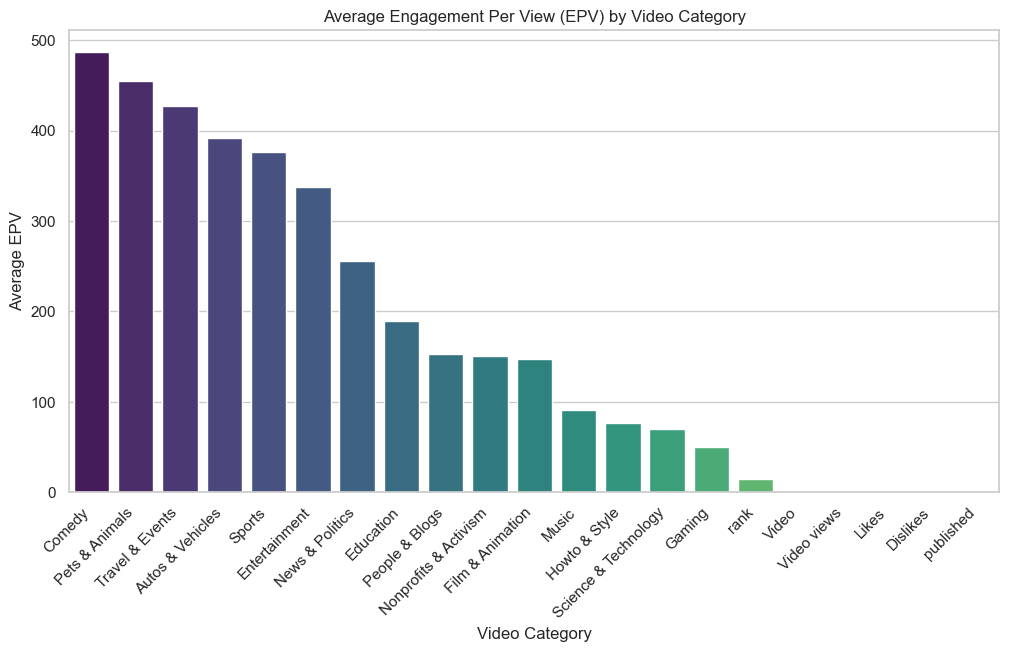

In [20]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create a barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=category_ranking,
    x="Category",
    y="Avg_EPV",
    palette="viridis"
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add labels and title
plt.xlabel("Video Category")
plt.ylabel("Average EPV")
plt.title("Average Engagement Per View (EPV) by Video Category")

# Show the plot
plt.show()